In [ ]:
import numpy as np
import pandas as pd
#from scipy.stats import binom,norm
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel,norm
#from scipy.stats import poisson
#from scipy.stats import expon
#from scipy.stats import geom
import seaborn as sns

In [ ]:
!gdown 1CvycZiIHqc25Eeg6hChh_1ZXcE_O1SP9


Downloading...
From: https://drive.google.com/uc?id=1CvycZiIHqc25Eeg6hChh_1ZXcE_O1SP9
To: /content/walmart_data.csv
100% 23.6M/23.6M [00:00<00:00, 32.7MB/s]


In [ ]:
import pandas as pd
df=pd.read_csv('walmart_data.csv')
df_copy = df.copy()
df_copy.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.describe(include = 'all')
age_data = df.groupby(["Age"])["Purchase"].describe()
age_data


,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [ ]:
#Checking the unique value in every column of the dataset.
for i in df.columns:
 print('Unique value in ', i , 'columns are :')
 print(df[i].unique())
 print("-"* 75)

NameError: name 'df' is not defined

In [ ]:
df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [ ]:
# Datatype of the columns in customers table:
df.dtypes

NameError: name 'df' is not defined

In [ ]:
#Number of rows and columns
df.shape

NameError: name 'df' is not defined

In [ ]:
#Missing values
df.isna()

NameError: name 'df' is not defined

In [ ]:
#Census of missing values using the sum-total fn() and found that no null values are seen
df.isna().sum()

NameError: name 'df' is not defined

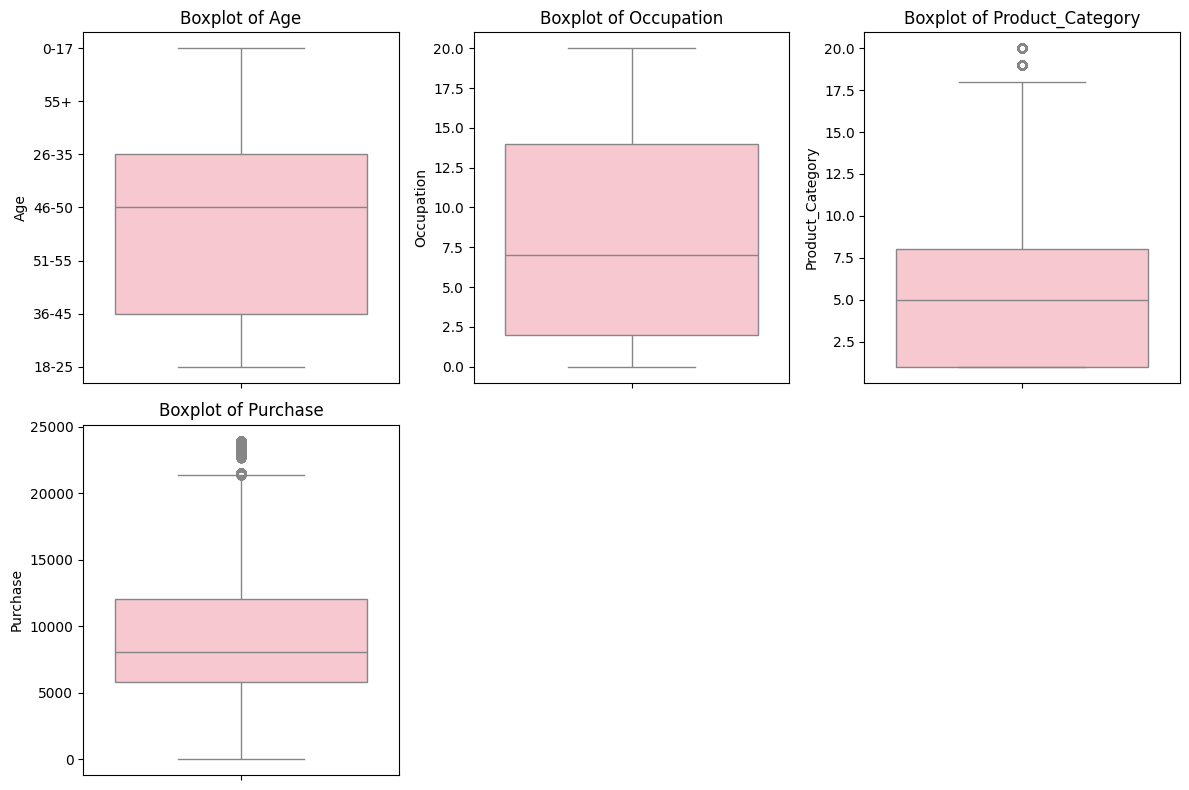

In [ ]:
#Only Purchase column has few rich customers
import matplotlib.pyplot as plt
# Continuous variables in the dataset
continuous_vars = ['Age', 'Occupation','Product_Category', 'Purchase']
# Plot boxplots for each continuous variable
plt.figure(figsize=(12, 8))
for i, var in enumerate(continuous_vars, start=1):
 plt.subplot(2, 3, i)
 sns.boxplot(data=df, y=var, color='pink')
 plt.title(f'Boxplot of {var}')
 plt.ylabel(var)
 plt.xlabel('')
plt.tight_layout()
plt.show()

<Axes: xlabel='Occupation'>

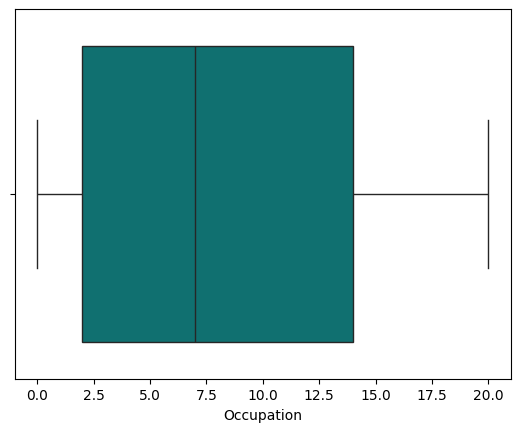

In [ ]:
#Boxplot on the continuous variable 'Miles'
sns.boxplot(x="Occupation",data=df,color='teal')

<Axes: xlabel='Age'>

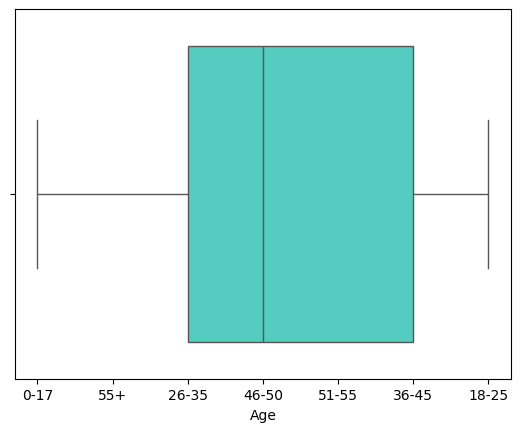

In [ ]:
#Boxplot on the continuous variable 'Usage'
sns.boxplot(x="Age",data=df,color='turquoise')

<Axes: xlabel='Stay_In_Current_City_Years'>

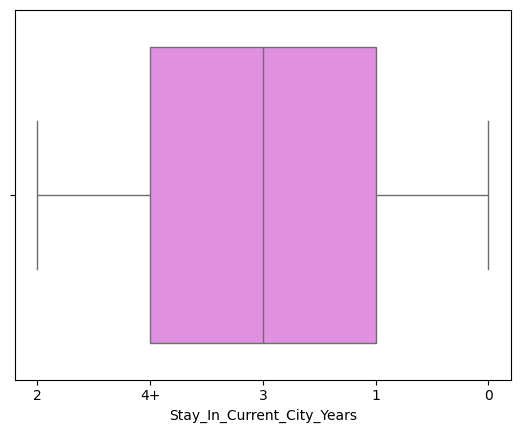

In [ ]:
#Boxplot on the continuous variable 'Years of Stay'
sns.boxplot(x="Stay_In_Current_City_Years",data=df,color='violet')

<Axes: xlabel='Purchase'>

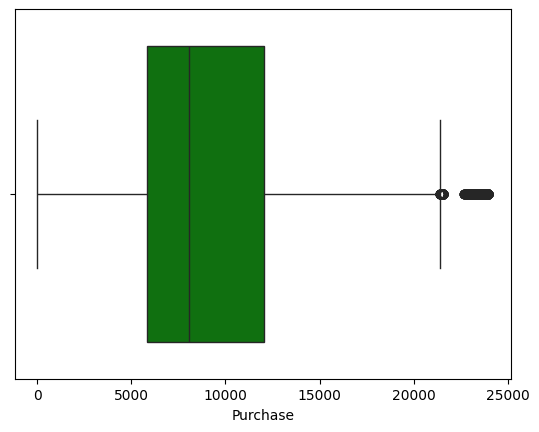

In [ ]:
#Few rich people is in the group
#Boxplot on the continuous variable 'Purchase'
sns.boxplot(x="Purchase",data=df,color='green')

In [ ]:
#Boxplot on the continuous variable 'Usage'
sns.boxplot(x="Product_Category",data=df)

<Axes: xlabel='Age', ylabel='Count'>

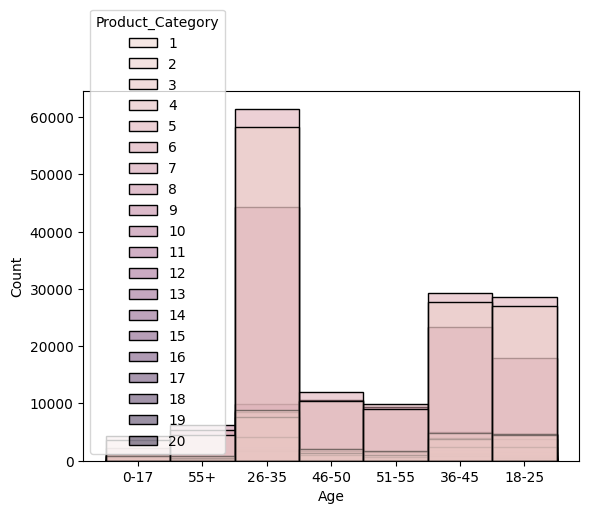

In [ ]:
sns.histplot(hue='Product_Category',x='Age', color='brown', edgecolor='black',data=df)

In [ ]:
#Clipped Occupation values between 5 and 95 percentiles

o1=np.percentile(df['Occupation'],5)
o2=np.percentile(df['Occupation'],95)
df['clipped']=np.clip(df['Occupation'],o1,o2,inplace=True)


KeyboardInterrupt: 

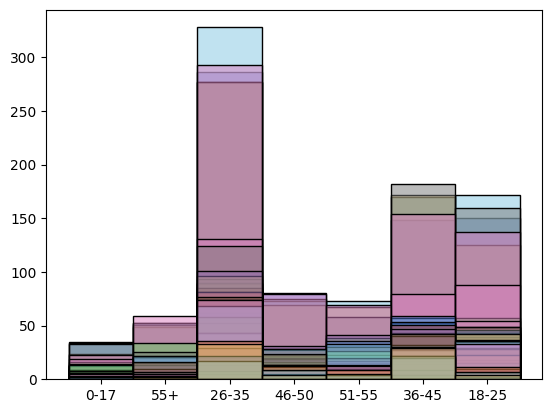

In [ ]:
# Above image comes with a keyboard interrupt only.In othercase, ValueError: Image size of 571x76144 pixels is too large. It must be less than 2^16 in each direction.
#<Figure size 640x480 with 1 Axes>
#Bivariate numerical-categorical variable plot
sns.histplot(data=df, x="Age", hue='Product_ID', bins='auto', palette='muted')

<Axes: xlabel='Age', ylabel='Count'>

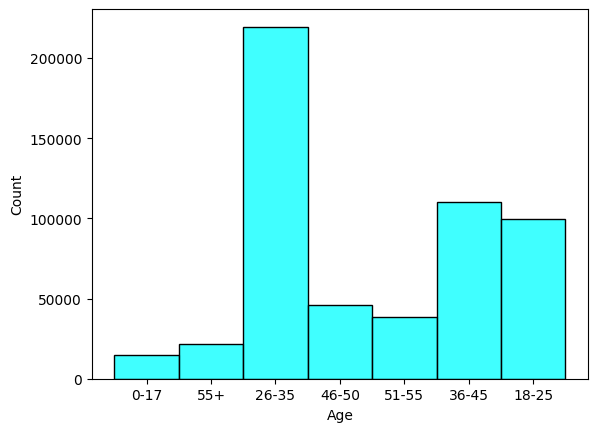

In [ ]:
import seaborn as sns
sns.histplot(df['Age'],color='cyan')

<Axes: ylabel='Product_Category'>

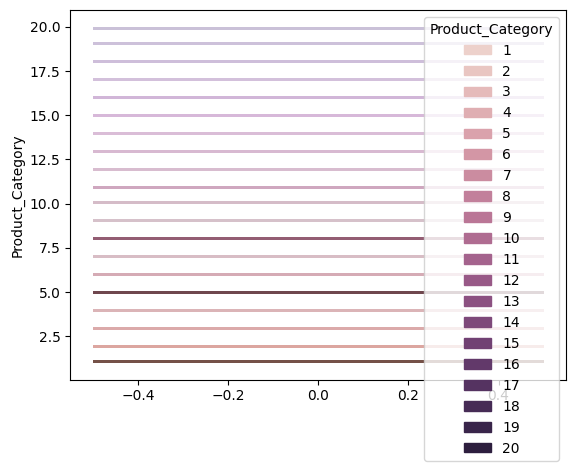

In [ ]:
sns.histplot(data=df,x='Gender'=='Female', y="Product_Category", hue='Product_Category',bins='auto',stat='count')

<Axes: xlabel='Age', ylabel='Product_Category'>

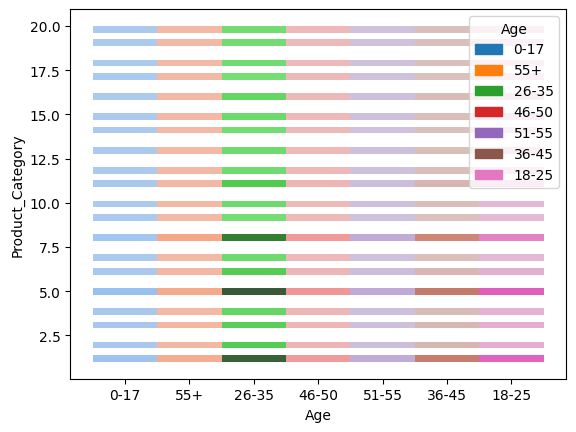

In [ ]:
sns.histplot(data=df,x='Age', y="Product_Category", hue='Age',bins=50)

<Axes: xlabel='Age', ylabel='Product_Category'>

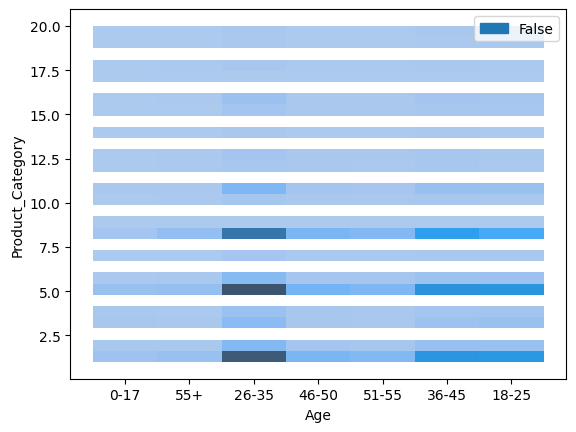

In [ ]:
sns.histplot(data=df,hue='Gender'=='Female', y="Product_Category",x='Age',bins=30,stat='count')

<Axes: xlabel='Age', ylabel='Purchase'>

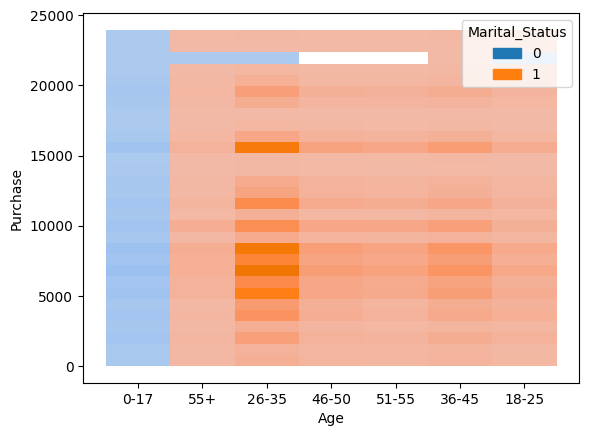

In [ ]:
sns.histplot(data=df,hue='Marital_Status', y="Purchase",x='Age',bins=30)

In [ ]:
#95% confidence intervala for the average amount spent per gender
mu=df.groupby('Gender')['Purchase'].mean()
sd=df.groupby('Gender')['Purchase'].std()
n=550068
se=sd/np.sqrt(n)
#z-multiplier for 95% is 1.96.
z=1.86
a,b=(mu+(z*se),mu-(z*se))
a-b



Gender
F    23.911188
M    25.541066
Name: Purchase, dtype: float64

In [ ]:
#95% confidence intervala for the average amount spent per gender
mu=df.groupby('Gender')['Purchase'].mean()
sd=df.groupby('Gender')['Purchase'].std()
n=300
se=sd/np.sqrt(n)
#z-multiplier for 95% is 1.96.
z=1.86
a,b=(mu+(z*se),mu-(z*se))
a,b

(Gender
 F    9246.505362
 M    9984.361405
 Name: Purchase, dtype: float64,
 Gender
 F    8222.626169
 M    8890.690676
 Name: Purchase, dtype: float64)

In [ ]:
#95% confidence intervala for the average amount spent per gender
mu=df.groupby('Gender')['Purchase'].mean()
sd=df.groupby('Gender')['Purchase'].std()
n=3000
se=sd/np.sqrt(n)
#z-multiplier for 95% is 1.96.
z=1.86
a,b=(mu+(z*se),mu-(z*se))
a,b

(Gender
 F    8896.455280
 M    9610.450566
 Name: Purchase, dtype: float64,
 Gender
 F    8572.676250
 M    9264.601515
 Name: Purchase, dtype: float64)

In [ ]:
#95% confidence intervala for the average amount spent per gender
mu=df.groupby('Gender')['Purchase'].mean()
sd=df.groupby('Gender')['Purchase'].std()
n=30000
se=sd/np.sqrt(n)
#z-multiplier for 95% is 1.96.
z=1.86
a,b=(mu+(z*se),mu-(z*se))
a-b

Gender
F    102.387919
M    109.367073
Name: Purchase, dtype: float64

**Is the confidence interval computed using the entire dataset wider for one of the group?**

According to the CLT calculation, I deduced the confidence interval to be
slightly higher for Men for all sample sizes.The gap increased for a smaller sizes in both men and women.

**ii. How is the width of the confidence interval affected by the sample size?**

It increased as the sample size decreased.

**iii. Do the confidence intervals for different sample sizes overlap?**

Yes, they do overlap.The smaller size pair contained all the values of the bigger size pairs.

**How does the sample size affect the shape of the distributions of the means?**

As the sample size increased, the confidence interval became more narrow.

In [ ]:
#95% confidence intervala for the average amount spent per age
mu=df.groupby('Age')['Purchase'].mean()
sd=df.groupby('Age')['Purchase'].std()
n=550068
se=sd/np.sqrt(n)
#z-multiplier for 95% is 1.96.
z=1.86
a,b=(mu+(z*se),mu-(z*se))
a-b
a,b

(Age
 0-17     8946.061828
 18-25    9182.260794
 26-35    9265.287820
 36-45    9343.947882
 46-50    9221.222885
 51-55    9547.405218
 55+      9348.877647
 Name: Purchase, dtype: float64,
 Age
 0-17     8920.867453
 18-25    9157.066419
 26-35    9240.093446
 36-45    9318.753508
 46-50    9196.028510
 51-55    9522.210844
 55+      9323.683272
 Name: Purchase, dtype: float64)

In [ ]:
#95% confidence intervala for the average amount spent per age
mu=df.groupby('Age')['Purchase'].mean()
sd=df.groupby('Age')['Purchase'].std()
n=300
se=sd/np.sqrt(n)
#z-multiplier for 95% is 1.96.
z=1.86
a,b=(mu+(z*se),mu-(z*se))
a-b
a,b

(Age
 0-17      9472.877318
 18-25     9709.076284
 26-35     9792.103310
 36-45     9870.763372
 46-50     9748.038375
 51-55    10074.220708
 55+       9875.693137
 Name: Purchase, dtype: float64,
 Age
 0-17     8394.051963
 18-25    8630.250929
 26-35    8713.277956
 36-45    8791.938018
 46-50    8669.213020
 51-55    8995.395354
 55+      8796.867782
 Name: Purchase, dtype: float64)

In [ ]:
#95% confidence intervala for the average amount spent per age
mu=df.groupby('Age')['Purchase'].mean()
sd=df.groupby('Age')['Purchase'].std()
n=3000
se=sd/np.sqrt(n)
#z-multiplier for 95% is 1.96.
z=1.86
a,b=(mu+(z*se),mu-(z*se))
a-b
a,b

(Age
 0-17     9104.041906
 18-25    9340.240872
 26-35    9423.267899
 36-45    9501.927961
 46-50    9379.202963
 51-55    9705.385297
 55+      9506.857725
 Name: Purchase, dtype: float64,
 Age
 0-17     8762.887375
 18-25    8999.086340
 26-35    9082.113367
 36-45    9160.773429
 46-50    9038.048432
 51-55    9364.230765
 55+      9165.703194
 Name: Purchase, dtype: float64)

In [ ]:
#95% confidence intervala for the average amount spent per age
mu=df.groupby('Age')['Purchase'].mean()
sd=df.groupby('Age')['Purchase'].std()
n=30000
se=sd/np.sqrt(n)
#z-multiplier for 95% is 1.96.
z=1.86
a,b=(mu+(z*se),mu-(z*se))
a,b


(Age
 0-17     8988.351438
 18-25    9223.725755
 26-35    9306.497258
 36-45    9385.290443
 46-50    9261.967218
 51-55    9589.439827
 55+      9390.097465
 Name: Purchase, dtype: float64,
 Age
 0-17     8878.577843
 18-25    9115.601457
 26-35    9198.884008
 36-45    9277.410947
 46-50    9155.284177
 51-55    9480.176235
 55+      9282.463454
 Name: Purchase, dtype: float64)

In [ ]:
#95% confidence intervala for the average amount spent per marital status
mu=df.groupby('Marital_Status')['Purchase'].mean()
sd=df.groupby('Marital_Status')['Purchase'].std()
n=550068
se=sd/np.sqrt(n)
#z-multiplier for 95% is 1.96.
z=1.86
a,b=(mu+(z*se),mu-(z*se))
a,b

(Marital_Status
 0    9278.515546
 1    9273.756293
 Name: Purchase, dtype: float64,
 Marital_Status
 0    9253.299692
 1    9248.592855
 Name: Purchase, dtype: float64)

In [ ]:
#95% confidence intervala for the average amount spent per marital status
mu=df.groupby('Marital_Status')['Purchase'].mean()
sd=df.groupby('Marital_Status')['Purchase'].std()
n=300
se=sd/np.sqrt(n)
#z-multiplier for 95% is 1.96.
z=1.86
a,b=(mu+(z*se),mu-(z*se))
a,b

(Marital_Status
 0    9805.780178
 1    9799.924886
 Name: Purchase, dtype: float64,
 Marital_Status
 0    8726.035060
 1    8722.424262
 Name: Purchase, dtype: float64)

In [ ]:
#95% confidence intervala for the average amount spent per marital status
mu=df.groupby('Marital_Status')['Purchase'].mean()
sd=df.groupby('Marital_Status')['Purchase'].std()
n=3000
se=sd/np.sqrt(n)
#z-multiplier for 95% is 1.96.
z=1.86
a,b=(mu+(z*se),mu-(z*se))
a,b

(Marital_Status
 0    9436.630312
 1    9431.542382
 Name: Purchase, dtype: float64,
 Marital_Status
 0    9095.184926
 1    9090.806767
 Name: Purchase, dtype: float64)

In [ ]:
#95% confidence intervala for the average amount spent per marital status
mu=df.groupby('Marital_Status')['Purchase'].mean()
sd=df.groupby('Marital_Status')['Purchase'].std()
sd1=df['Purchase'].std()
n=30000
se=sd/np.sqrt(n)
#z-multiplier for 95% is 1.96.
z=1.86
a,b=(mu+(z*se),mu-(z*se))
a-b


Marital_Status
0    107.974512
1    107.750062
Name: Purchase, dtype: float64

<Axes: ylabel='Probability'>

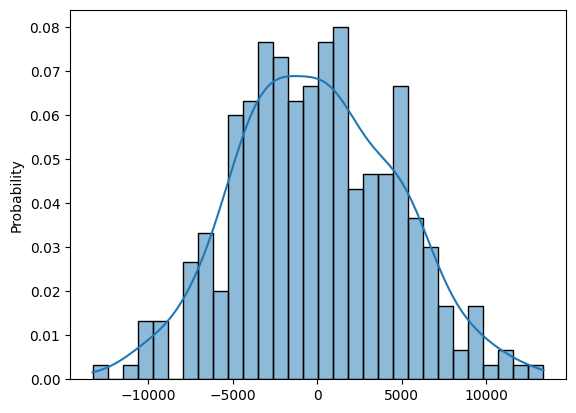

In [ ]:
#Hardly inclined to be a Gausssian distribution,n=300
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np,pandas as pd
df=pd.read_csv('walmart_data.csv')
mu=df['Marital_Status'].mean()
sd=df['Purchase'].std()
df= np.random.normal(mu, sd, 300)
sns.histplot(df, bins=30, kde=True, stat='probability')


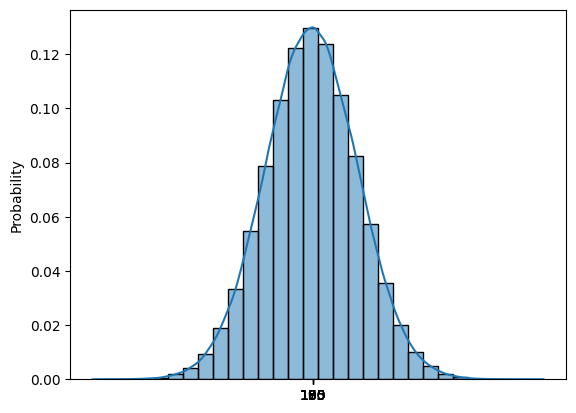

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('walmart_data.csv')
mu=df['Marital_Status'].mean()
sd=df['Purchase'].std()
df= np.random.normal(mu, sd, 550068)

sns.histplot(df, bins=30, kde=True, stat='probability')
plt.xticks(range(155,200,5))
plt.show()

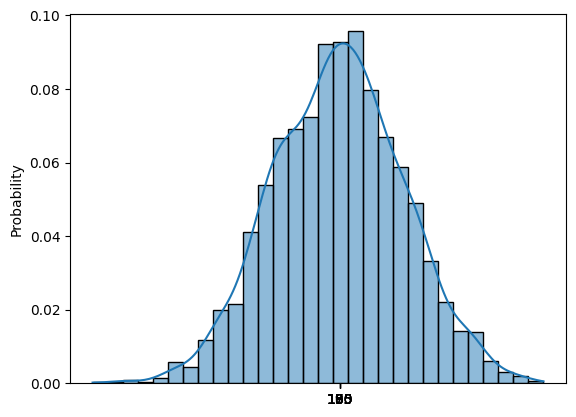

In [ ]:
df=pd.read_csv('walmart_data.csv')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('walmart_data.csv')

mu=df['Marital_Status'].mean()
sd=df['Purchase'].std()
df= np.random.normal(mu, sd, 3000)

sns.histplot(df, bins=30, kde=True, stat='probability')
plt.xticks(range(155,200,5))
plt.show()

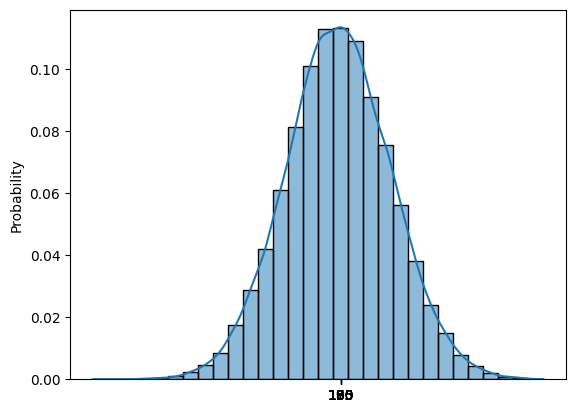

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('walmart_data.csv')

mu=df['Marital_Status'].mean()
sd=df['Purchase'].std()
df= np.random.normal(mu, sd, 30000)

sns.histplot(df, bins=30, kde=True, stat='probability')
plt.xticks(range(155,200,5))
plt.show()

Is the confidence interval computed using the entire dataset wider for
one of the group?

The upper limit of both groups seemed to be greater than avg value.


ii. How is the width of the confidence interval affected by the sample size?

For both Married and Single , for all sample sizes the interval seems to be almost same, but relatively smaller one differed insignificantly.

iii. Do the confidence intervals for different sample sizes overlap?


They are overlapping irrespective of sample size value.And the smaller sample size has got all other values included. Higher the sampler size, there is no overlap happening.
iv. How does the sample size affect the shape of the distributions of the means?

The graph is inclined to be Gaussian distributed as the sample size increases ! Central Limit Theorem is proving, normal distribution can be found in most of the sample data when size is more.The probability distribution resemble a bell curve because majority of the values would be clustered along the mean value.

Report whether the confidence intervals for the average amount spent by males
and females (computed using all the data) overlap. How can Walmart leverage
this conclusion to make changes or improvements?


For the smallest sample size(300),  the average amount spent by males
and females overlap and viceversa.